<a href="https://colab.research.google.com/github/n-goyal/python-test/blob/master/Stock_Market_Analysis_part1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic

## Libraries & tools

In [0]:
#Basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date

In [231]:
#data collection
!pip install nsepy
from nsepy import get_history

### Data Visualization - Part II

## Data collection

In [0]:
tcs_data = get_history(symbol='TCS',
                    start=date(2018,4,1), 
                    end=date(2019,2,28))

infy_data = get_history(symbol='INFY',
                    start=date(2018,4,1), 
                    end=date(2019,2,28))

niftyit = get_history(symbol="NIFTY IT",
                      start=date(2018,4,1), 
                      end=date(2019,2,28),
                      index = True)

In [235]:
niftyit.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2018-04-02,12542.30,12723.40,12541.35,12707.10,NaN,NaN
2018-04-03,12637.80,12708.15,12557.05,12615.45,NaN,NaN
2018-04-04,12689.90,12689.90,12442.15,12490.85,19361343.0,1.329900e+10
2018-04-05,12617.45,12695.80,12578.95,12682.55,19539171.0,1.359370e+10
2018-04-06,12685.30,12687.40,12569.25,12603.35,17601483.0,1.147620e+10


# Part - I

##Volume Shock, Price Shock

    # Time to add some new columns
    # volume_shock = Volume[t] - Volume[t-1]
    # price_shock = Close[t] - Close[t-1]
    # Percentage_Volume_shock = volume_shock / Prev Volume * 100
    # Percentage_close = price_shock / Prev Close * 100

In [0]:
tcs = tcs_data
infy = infy_data
nifty = niftyit

In [237]:
nifty.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2018-04-02,12542.30,12723.40,12541.35,12707.10,NaN,NaN
2018-04-03,12637.80,12708.15,12557.05,12615.45,NaN,NaN
2018-04-04,12689.90,12689.90,12442.15,12490.85,19361343.0,1.329900e+10
2018-04-05,12617.45,12695.80,12578.95,12682.55,19539171.0,1.359370e+10
2018-04-06,12685.30,12687.40,12569.25,12603.35,17601483.0,1.147620e+10


In [0]:
#checking on the shock percentage
def volume_shock(data): 
  data['Volume_diff'] = data['Volume'].diff(1)
  return data['Volume'].diff(1) / data['Volume'] * 100
  
def price_shock(data):
  data['Price_diff'] = data['Close'].diff(1)
  return data['Close'].diff(1) / data['Close'] * 100

def dummy(data):
#   drop(data)
  data['Volume_shock'] = [1 if abs(i)>0 else 0 for i in volume_shock(data)]
  data['Price_shock'] = [1 if abs(i)>2 else 0 for i in price_shock(data)]
  data['PriceV/Svolume'] = [1 if (data['Volume_shock'][i]==0 and data['Price_shock'][i]==1) 
                            else 0 for i in range(len(price_shock(data)))]
  return data

In [0]:
tcs_dummy = dummy(tcs)
infy_dummy = dummy(infy)
nifty_dummy = dummy(nifty)
tcs_dummy.name = 'TCS'
infy_dummy.name = 'INFY'
nifty_dummy.name = 'NIFTY'

In [240]:
nifty_dummy.head()

,Open,High,Low,Close,Volume,Turnover,Volume_diff,Volume_shock,Price_diff,Price_shock,PriceV/Svolume
Date,,,,,,,,,,,
2018-04-02,12542.30,12723.40,12541.35,12707.10,NaN,NaN,NaN,0,NaN,0,0
2018-04-03,12637.80,12708.15,12557.05,12615.45,NaN,NaN,NaN,0,-91.65,0,0
2018-04-04,12689.90,12689.90,12442.15,12490.85,19361343.0,1.329900e+10,NaN,0,-124.60,0,0
2018-04-05,12617.45,12695.80,12578.95,12682.55,19539171.0,1.359370e+10,177828.0,1,191.70,0,0
2018-04-06,12685.30,12687.40,12569.25,12603.35,17601483.0,1.147620e+10,-1937688.0,1,-79.20,0,0


## Moving Averages

### Window = [4,16,28,40,52]

In [0]:
#importing data.. again - to be clearer
tcs = tcs_data
infy = infy_data
nifty = niftyit

In [0]:
# Converting index to datetime index
def to_datetime(data):
  data.index = pd.to_datetime(data.index)
  return data

In [0]:
tcs = to_datetime(tcs)
infy = to_datetime(infy)
nifty = to_datetime(nifty)

    As moving average is to be calculated over weeks
    We'll resample our data over weeks and take moving average

In [0]:
def movingAverage(data, column, window):
    resampled_df = pd.DataFrame()
    x = data[column].resample('W').mean()
    resampled_df['Close'] = x
    for win in window:
        rolling_window = x.rolling(window=win)
        resampled_df[str(win) + 'WeeksWindow'] = rolling_window.mean()
    return resampled_df

In [0]:
window = [4,16,28,40,52]
column = 'Close'
tcs_ma= movingAverage(tcs, column, window)
infy_ma = movingAverage(infy, column, window)
nifty_ma = movingAverage(nifty, column, window)

In [246]:
tcs_ma.head()

,Close,4WeeksWindow,16WeeksWindow,28WeeksWindow,40WeeksWindow,52WeeksWindow
Date,,,,,,
2018-04-08,2928.0100,NaN,NaN,NaN,NaN,NaN
2018-04-15,3033.6400,NaN,NaN,NaN,NaN,NaN
2018-04-22,3221.3900,NaN,NaN,NaN,NaN,NaN
2018-04-29,3451.1500,3158.547500,NaN,NaN,NaN,NaN
2018-05-06,3498.6125,3301.198125,NaN,NaN,NaN,NaN


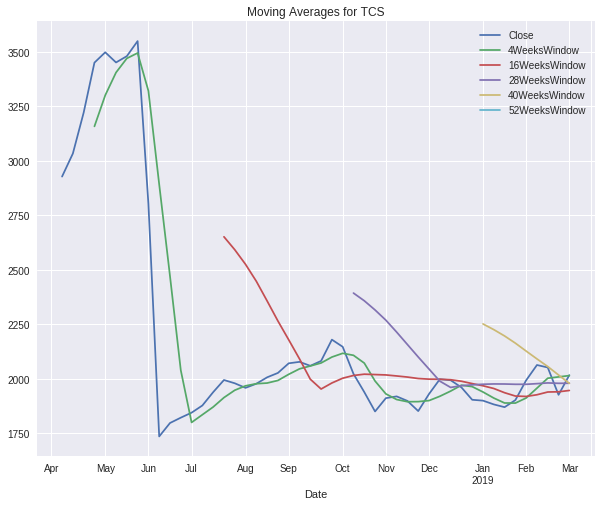

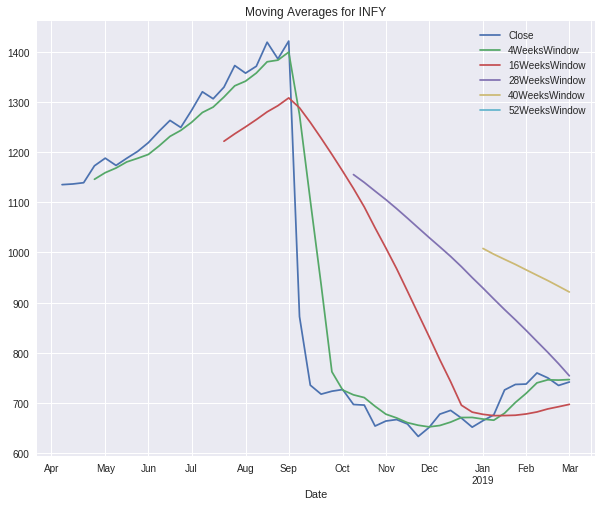

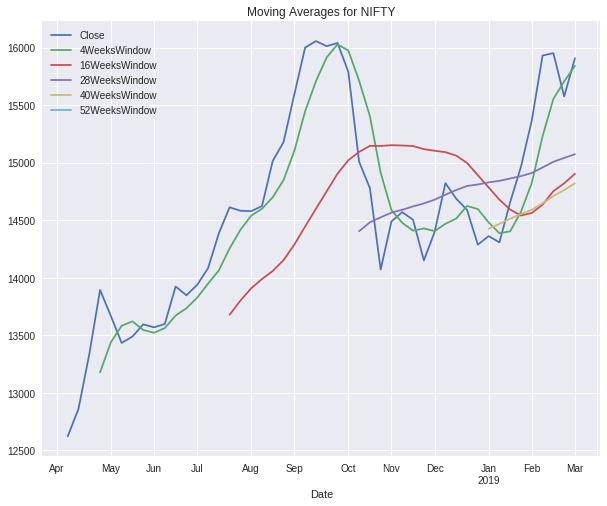

In [247]:
tcs_ma.plot(figsize=(10,8), title="Moving Averages for TCS")
infy_ma.plot(figsize=(10,8), title="Moving Averages for INFY")
nifty_ma.plot(figsize=(10,8), title="Moving Averages for NIFTY")

### Window = 10, 75, Considering Holidays

    # task: rolling mean with window = [10, 75]
    # rolling window w/o resampling is throwing nans and doesn't considering the holidays
    # Resamping with frequency with Dates

In [0]:
def plot_roll_window(stock, window, stock_name):
  stock = stock.asfreq('D', method='ffill')
  stock['Window '+str(window)] = stock['Close'].rolling(window).mean()
  plt.figure()
  stock['Window '+str(window)].plot()
  plt.title('roll avg for {0} with window = {1} Days'.format(stock_name, window))
  plt.legend()
  return stock

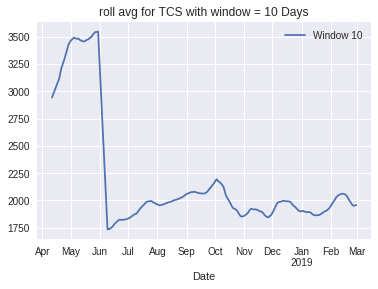

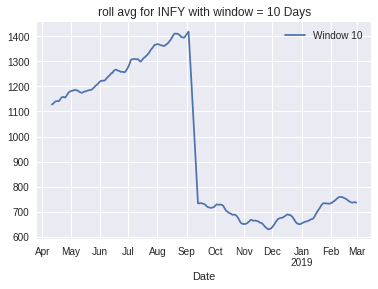

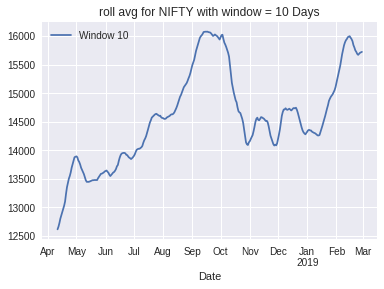

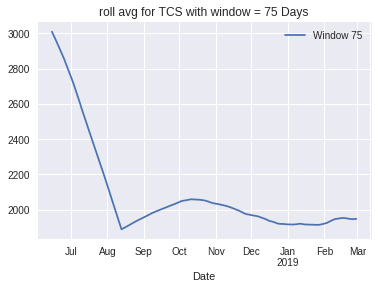

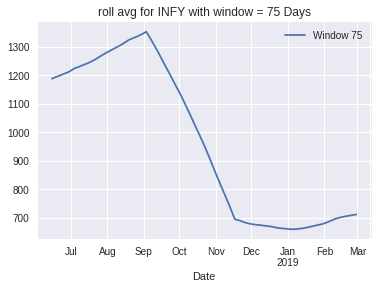

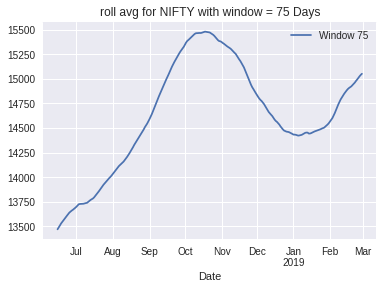

In [265]:
window = [10, 75]
for win in window:
  plot_roll_window(tcs, win, 'TCS')
  plot_roll_window(infy, win, 'INFY')
  plot_roll_window(nifty, win, 'NIFTY')

# Part - II Visualization

## TimeSeriesVisualization

In [0]:
# Mentioned Using Bokeh
import bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.io import show, output_notebook

In [0]:
def timeSeriesPlot(dummy_data):
  name = dummy_data.name
  dummy_data['Height'] = abs(dummy_data['Price_diff'])
  dummy_data.index = pd.to_datetime(dummy_data.index)
  
  output_notebook()
  hours_12 = 12 * 60 * 60 * 1000
  p = figure(x_axis_type='datetime', width=1000, height = 300)
  p.rect(dummy_data.index[dummy_data['Volume_shock'] == 1],
           dummy_data.Close[dummy_data['Volume_shock'] == 1],
           hours_12,
           dummy_data.Height[dummy_data['Volume_shock'] == 1],
           color = 'red',
           line_color="black")

  p.rect(dummy_data.index[dummy_data['Volume_shock'] == 0],
           dummy_data.Close[dummy_data['Volume_shock'] == 0],
           hours_12,
           dummy_data.Height[dummy_data['Volume_shock'] == 0],
           color = 'blue',
           line_color="black")
  
  return show(p), output_file('graph {}.html'.format(name))


In [0]:
def volumeLessPriceMovement(dummy_data):
  dummy_data['Height'] = abs(dummy_data['Price_diff'])
  dummy_data.index = pd.to_datetime(dummy_data.index)
  name = dummy_data.name
  output_notebook()
  hours_12 = 12 * 60 * 60 * 1000
  p = figure(x_axis_type='datetime', width=1000, height = 300)
  p.rect(dummy_data.index[dummy_data['PriceV/Svolume'] == 1],
           dummy_data.Close[dummy_data['PriceV/Svolume'] == 1],
           hours_12,
           dummy_data.Height[dummy_data['PriceV/Svolume'] == 1],
           color = 'red',
           line_color="black")

  p.rect(dummy_data.index[dummy_data['PriceV/Svolume'] == 0],
           dummy_data.Close[dummy_data['PriceV/Svolume'] == 0],
           hours_12,
           dummy_data.Height[dummy_data['PriceV/Svolume'] == 0],
           color = 'blue',
           line_color="black")
  
  return show(p), output_file('graph2 {}.html'.format(name))

In [196]:
timeSeriesPlot(tcs_dummy)

Loading BokehJS ...

(None, None)

In [197]:
timeSeriesPlot(infy_dummy)

Loading BokehJS ...

(None, None)

In [272]:
timeSeriesPlot(nifty_dummy)

Loading BokehJS ...

(None, None)

In [267]:
# tcs_dummy[tcs_dummy['Volume_shock'] == 0]
nifty_dummy[nifty_dummy['Volume_shock'] == 0]

,Open,High,Low,Close,Volume,Turnover,Volume_diff,Volume_shock,Price_diff,Price_shock,PriceV/Svolume,Height
Date,,,,,,,,,,,,
2018-04-02,12542.30,12723.40,12541.35,12707.10,NaN,NaN,NaN,0,NaN,0,0,NaN
2018-04-03,12637.80,12708.15,12557.05,12615.45,NaN,NaN,NaN,0,-91.65,0,0,91.65
2018-04-04,12689.90,12689.90,12442.15,12490.85,19361343.0,1.329900e+10,NaN,0,-124.60,0,0,124.60
2018-04-09,12605.35,12640.30,12506.40,12531.20,NaN,NaN,NaN,0,-72.15,0,0,72.15
2018-04-10,12532.25,12618.80,12519.45,12576.50,21570755.0,1.408330e+10,NaN,0,45.30,0,0,45.30
2018-04-18,13185.20,13218.45,13106.30,13124.00,NaN,NaN,NaN,0,-38.30,0,0,38.30
2018-04-19,13192.95,13295.70,13157.85,13273.45,23540245.0,2.308100e+10,NaN,0,149.45,0,0,149.45


In [200]:
volumeLessPriceMovement(tcs_dummy)

Loading BokehJS ...

(None, None)

In [202]:
volumeLessPriceMovement(infy_dummy)

Loading BokehJS ...

(None, None)

In [271]:
volumeLessPriceMovement(nifty_dummy)

Loading BokehJS ...

(None, None)

    Graph indicates that there wasnot any such movement where price shock occured without volume shock in the acquired data

In [171]:
dummy_data = infy_dummy
dummy_data[dummy_data['PriceV/Svolume'] == 1]

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Volume_diff,Volume_shock,Price_diff,Price_shock,PriceV/Svolume,Height
Date,,,,,,,,,,,,,,,,,,,,


## Autocorrelation Plot

In [0]:
from statsmodels.tsa.stattools import acf, pacf
tcs.name = 'tcs'
infy.name = 'infy'
nifty.name = 'nifty'

def draw_pacf(stock):
    name = stock.name
    '''
    Using the source code guide line: 
    https://www.statsmodels.org/dev/_modules/statsmodels/graphics/tsaplots.html#plot_pacf
    
    x-axis = lags, if not specified, use lags=np.arange(len(corr))
    y-axis = correlations
    '''
    lags = 50
    x = list(range(lags))
    output_notebook()
    p = figure(plot_height=500, title="Partial Autocorrelation PLot {}" .format(stock.name))
    partial_autocorr = pacf(stock["Close"], nlags=lags-1)
    p.vbar(x=x, top=partial_autocorr, width=0.9)
    
    output_file('pacf_{}.html'.format(name))
    show(p)

In [270]:
draw_pacf(tcs)
draw_pacf(infy)
draw_pacf(nifty)

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...